In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/T5_finetuning/Dataset2/Restaurant2014/Train /Restaurants_Train_Formatted.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentenceId        3044 non-null   int64 
 1   raw_text          3044 non-null   object
 2   aspectTerms       3044 non-null   object
 3   aspectCategories  3044 non-null   object
dtypes: int64(1), object(3)
memory usage: 95.3+ KB


In [ ]:
df.head()

,sentenceId,raw_text,aspectTerms,aspectCategories
0,3121,But the staff was so horrible to us.,"[{'term': 'staff', 'polarity': 'negative'}]","[{'category': 'service', 'polarity': 'negative'}]"
1,2777,"To be completely fair, the only redeeming fact...","[{'term': 'food', 'polarity': 'positive'}]","[{'category': 'food', 'polarity': 'positive'},..."
2,1634,"The food is uniformly exceptional, with a very...","[{'term': 'food', 'polarity': 'positive'}, {'t...","[{'category': 'food', 'polarity': 'positive'}]"
3,2534,Where Gabriela personaly greets you and recomm...,noaspectterm,"[{'category': 'service', 'polarity': 'positive'}]"
4,583,"For those that go once and don't enjoy it, all...",noaspectterm,"[{'category': 'anecdotes/miscellaneous', 'pola..."


In [ ]:
import ast
from collections import Counter

# Extract aspect terms and sentiments
aspect_terms_list = []
sentiment_list = []

for aspects in df["aspectTerms"]:
    if aspects != "noaspectterm":
        aspects_parsed = ast.literal_eval(aspects)  # Convert string to list of dicts
        for aspect in aspects_parsed:
            aspect_terms_list.append(aspect["term"])
            sentiment_list.append(aspect["polarity"])

# Count frequency of aspect terms and sentiments
aspect_term_counts = Counter(aspect_terms_list)
sentiment_counts = Counter(sentiment_list)

# Convert to DataFrame for visualization
aspect_term_df = pd.DataFrame(aspect_term_counts.items(), columns=["Aspect Term", "Frequency"]).sort_values(by="Frequency", ascending=False)
sentiment_df = pd.DataFrame(sentiment_counts.items(), columns=["Sentiment", "Count"]).sort_values(by="Count", ascending=False)



In [ ]:
aspect_term_df

,Aspect Term,Frequency
1,food,358
35,service,206
51,place,64
37,prices,60
3,menu,58
...,...,...
580,Thai cuisine,1
582,herbs,1
583,tomatoes,1
585,root vegetables,1


In [ ]:
sentiment_df

,Sentiment,Count
1,positive,2164
0,negative,807
2,neutral,637
3,conflict,91


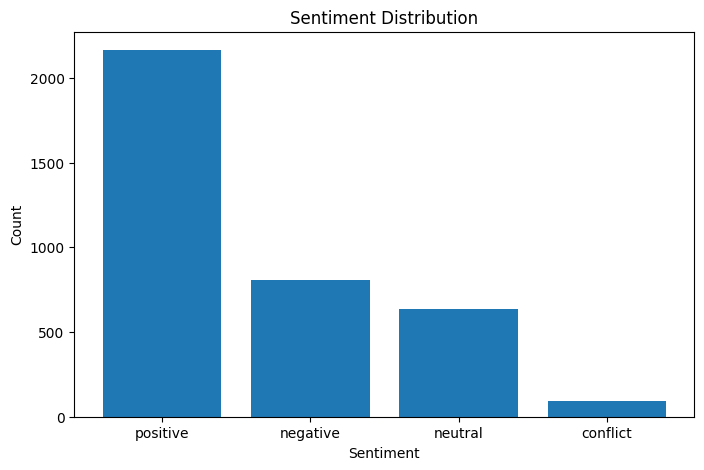

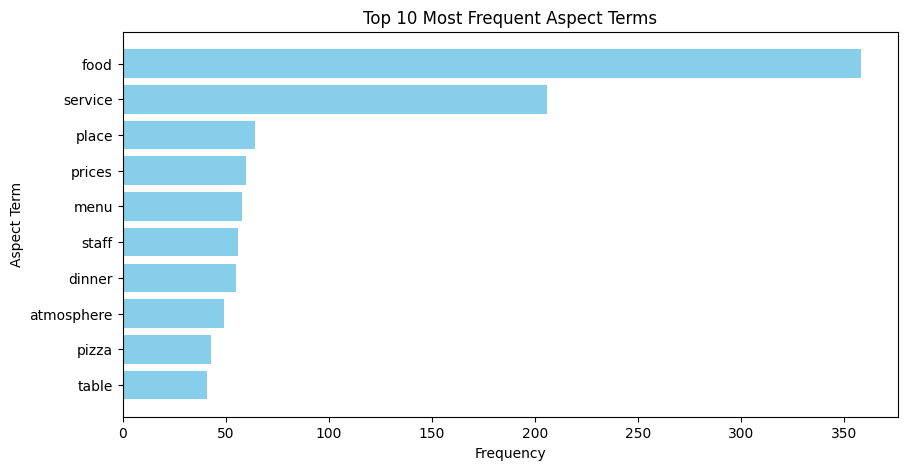

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_df["Sentiment"], sentiment_df["Count"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

# Plot top 10 most frequent aspect terms
top_aspect_terms = aspect_term_df.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_aspect_terms["Aspect Term"], top_aspect_terms["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Aspect Term")
plt.title("Top 10 Most Frequent Aspect Terms")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
file_path = "/content/drive/MyDrive/T5_finetuning/Dataset2/Restaurant2014/Test/Restaurants_Test_Gold_Formatted.csv"

df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentenceId        800 non-null    object
 1   raw_text          800 non-null    object
 2   aspectTerms       800 non-null    object
 3   aspectCategories  800 non-null    object
dtypes: object(4)
memory usage: 25.1+ KB


In [ ]:
df.head()

,sentenceId,raw_text,aspectTerms,aspectCategories
0,32897564#894393#2,The bread is top notch as well.,"[{'term': 'bread', 'polarity': 'positive'}]","[{'category': 'food', 'polarity': 'positive'}]"
1,33070600#670328#0,I have to say they have one of the fastest del...,"[{'term': 'delivery times', 'polarity': 'posit...","[{'category': 'service', 'polarity': 'positive'}]"
2,33070600#670328#2,Food is always fresh and hot- ready to eat!,"[{'term': 'Food', 'polarity': 'positive'}]","[{'category': 'food', 'polarity': 'positive'}]"
3,36244464#949326#5,Did I mention that the coffee is OUTSTANDING?,"[{'term': 'coffee', 'polarity': 'positive'}]","[{'category': 'food', 'polarity': 'positive'}]"
4,32894246#870052#0,"Certainly not the best sushi in New York, howe...","[{'term': 'sushi', 'polarity': 'conflict'}, {'...","[{'category': 'food', 'polarity': 'conflict'},..."


In [ ]:
import ast
from collections import Counter

# Extract aspect terms and sentiments
aspect_terms_list = []
sentiment_list = []

for aspects in df["aspectTerms"]:
    if aspects != "noaspectterm":
        aspects_parsed = ast.literal_eval(aspects)  # Convert string to list of dicts
        for aspect in aspects_parsed:
            aspect_terms_list.append(aspect["term"])
            sentiment_list.append(aspect["polarity"])

# Count frequency of aspect terms and sentiments
aspect_term_counts = Counter(aspect_terms_list)
sentiment_counts = Counter(sentiment_list)

# Convert to DataFrame for visualization
aspect_term_df = pd.DataFrame(aspect_term_counts.items(), columns=["Aspect Term", "Frequency"]).sort_values(by="Frequency", ascending=False)
sentiment_df = pd.DataFrame(sentiment_counts.items(), columns=["Sentiment", "Count"]).sort_values(by="Count", ascending=False)



In [ ]:
aspect_term_df

,Aspect Term,Frequency
14,food,120
22,service,68
60,atmosphere,22
11,menu,22
35,staff,21
...,...,...
233,beans,1
231,Delmonico steak,1
225,Cosi sandwiches,1
224,Coffee,1


In [ ]:

sentiment_df

,Sentiment,Count
0,positive,728
2,neutral,196
3,negative,196
1,conflict,14


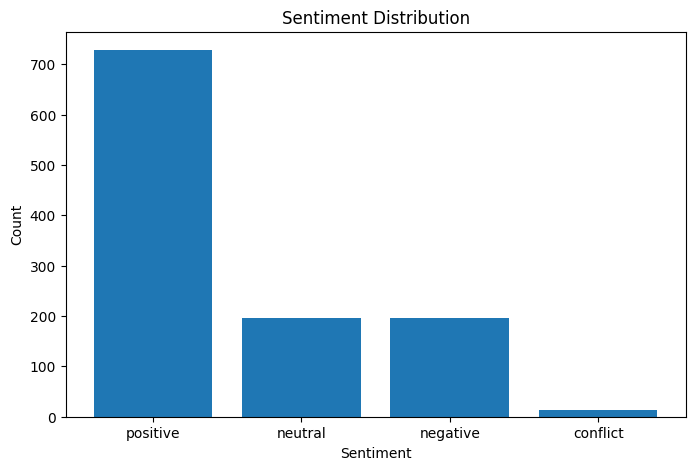

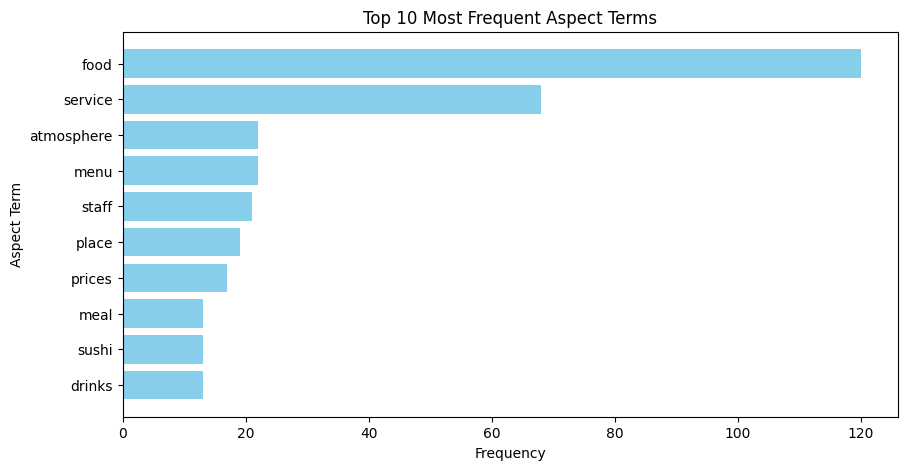

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_df["Sentiment"], sentiment_df["Count"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

# Plot top 10 most frequent aspect terms
top_aspect_terms = aspect_term_df.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_aspect_terms["Aspect Term"], top_aspect_terms["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Aspect Term")
plt.title("Top 10 Most Frequent Aspect Terms")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
file_path = "/content/drive/MyDrive/T5_finetuning/Dataset2/Restaurant2014/Trial/Restaurants_Trial_Formatted.csv"

df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentenceId        100 non-null    int64 
 1   raw_text          100 non-null    object
 2   aspectTerms       100 non-null    object
 3   aspectCategories  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
import ast
from collections import Counter

# Extract aspect terms and sentiments
aspect_terms_list = []
sentiment_list = []

for aspects in df["aspectTerms"]:
    if aspects != "noaspectterm":
        aspects_parsed = ast.literal_eval(aspects)  # Convert string to list of dicts
        for aspect in aspects_parsed:
            aspect_terms_list.append(aspect["term"])
            sentiment_list.append(aspect["polarity"])

# Count frequency of aspect terms and sentiments
aspect_term_counts = Counter(aspect_terms_list)
sentiment_counts = Counter(sentiment_list)

# Convert to DataFrame for visualization
aspect_term_df = pd.DataFrame(aspect_term_counts.items(), columns=["Aspect Term", "Frequency"]).sort_values(by="Frequency", ascending=False)
sentiment_df = pd.DataFrame(sentiment_counts.items(), columns=["Sentiment", "Count"]).sort_values(by="Count", ascending=False)
aspect_term_df.head()


,Aspect Term,Frequency
14,food,16
13,prices,4
27,service,3
9,Service,3
33,bagels,2


In [ ]:
sentiment_df

,Sentiment,Count
0,positive,68
1,negative,18
2,neutral,10


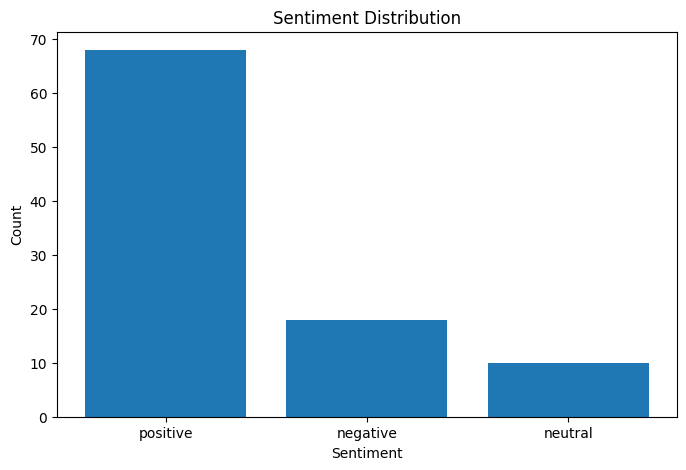

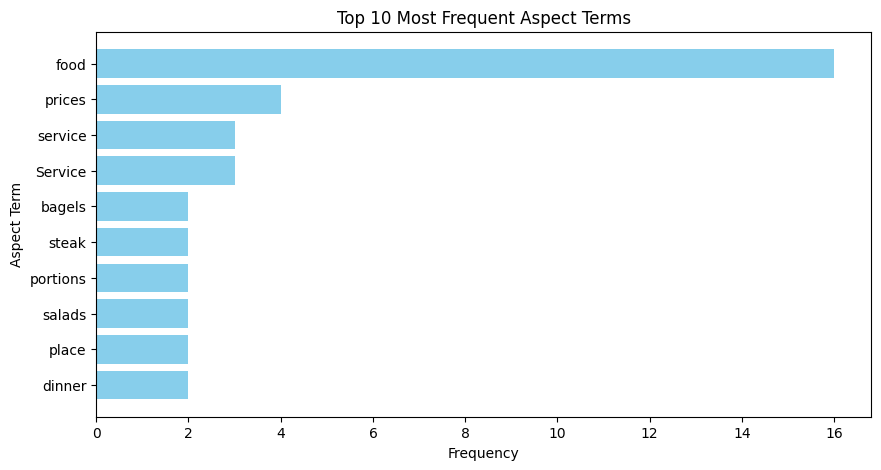

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_df["Sentiment"], sentiment_df["Count"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

# Plot top 10 most frequent aspect terms
top_aspect_terms = aspect_term_df.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_aspect_terms["Aspect Term"], top_aspect_terms["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Aspect Term")
plt.title("Top 10 Most Frequent Aspect Terms")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
